# Titanic - Machine Learning from Disaster 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv("train.csv")

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df['Age']=df['Age'].fillna(df['Age'].median()).astype(int)
#df['Age']df['Age'].astype(int)

In [14]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

# EDA

In [16]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

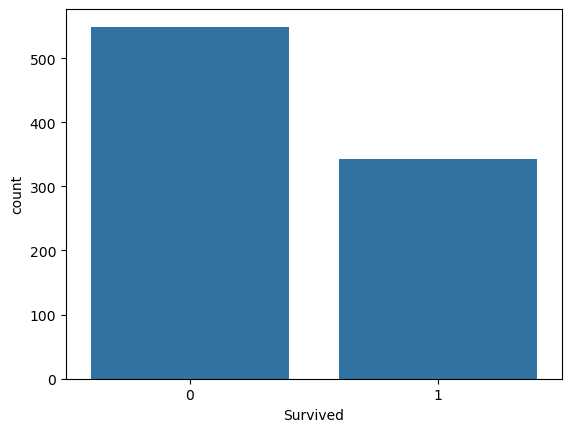

In [17]:
sns.countplot(x=df.Survived)

In [18]:
pd.crosstab(df.Sex,df.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex', ylabel='count'>

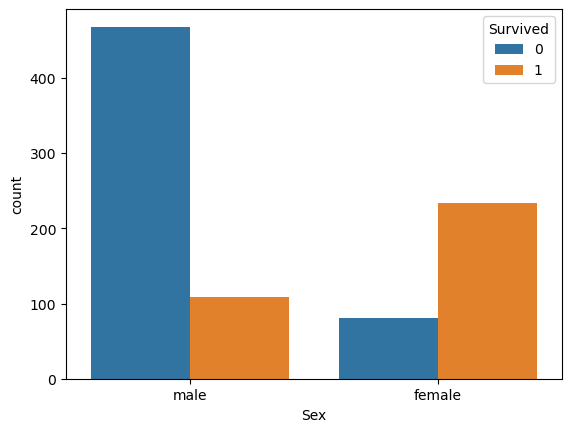

In [19]:
sns.countplot(x='Sex', data=df, hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

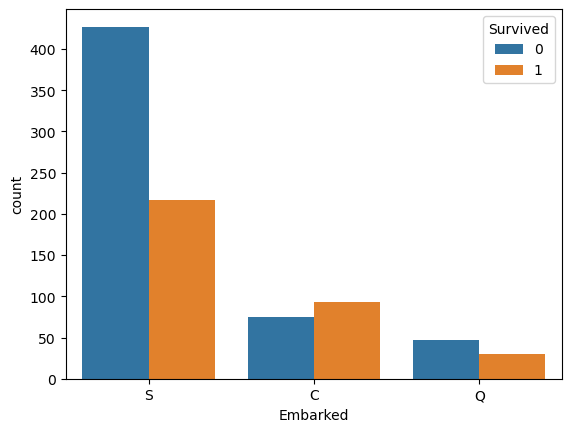

In [20]:
sns.countplot(x='Embarked', data=df, hue='Survived')

In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
# total number of family members on board
df['Family_Size']=df['SibSp']+df['Parch']+1

In [23]:
# Create a feature to indicate if a passenger is alone
df['IsAlone']=(df['Family_Size']==1).astype(int)

In [24]:
df['IsAlone'].head()

0    0
1    0
2    1
3    0
4    1
Name: IsAlone, dtype: int32

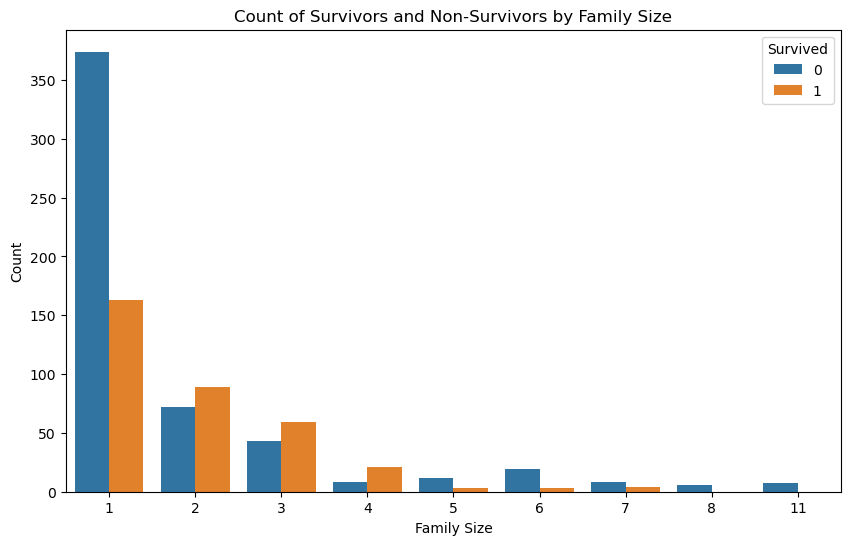

In [25]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', hue='Survived', data=df)
plt.title('Count of Survivors and Non-Survivors by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [26]:
df.Sex.replace({'male':1,'female':0},inplace=True)

In [27]:
df=df.drop(columns=['PassengerId','Ticket','Cabin','SibSp','Parch','Name'])


In [28]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True).astype(int)


In [29]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family_Size,IsAlone,Embarked_Q,Embarked_S
0,0,3,1,22,7,2,0,0,1
1,1,1,0,38,71,2,0,0,0
2,1,3,0,26,7,1,1,0,1
3,1,1,0,35,53,2,0,0,1
4,0,3,1,35,8,1,1,0,1


In [30]:
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Sex,Age,Fare,Family_Size,IsAlone,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.064909,0.257482,0.016639,-0.203367,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.339999,-0.550553,0.065997,0.135207,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.080750,-0.182331,-0.200988,0.303646,-0.074115,0.125722
Age,-0.064909,-0.339999,0.080750,1.000000,0.097064,-0.245593,0.171807,-0.031479,-0.014176
Fare,0.257482,-0.550553,-0.182331,0.097064,1.000000,0.217052,-0.272355,-0.118319,-0.165803
Family_Size,0.016639,0.065997,-0.200988,-0.245593,0.217052,1.000000,-0.690922,-0.058592,0.079977
IsAlone,-0.203367,0.135207,0.303646,0.171807,-0.272355,-0.690922,1.000000,0.086464,0.024929
Embarked_Q,0.003650,0.221009,-0.074115,-0.031479,-0.118319,-0.058592,0.086464,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,-0.014176,-0.165803,0.079977,0.024929,-0.496624,1.000000


<Axes: >

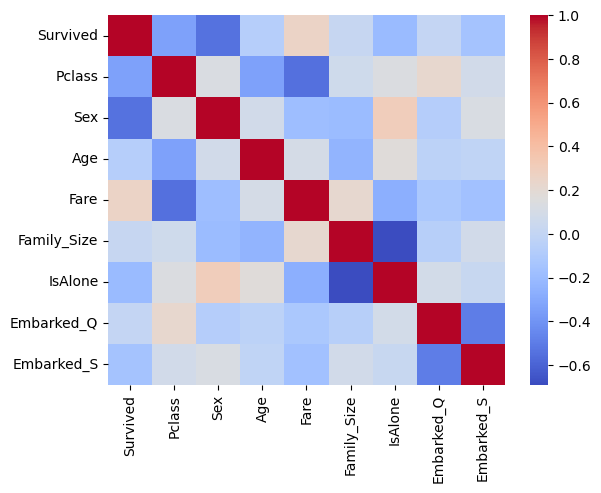

In [31]:
sns.heatmap(corr_matrix, cmap='coolwarm')


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_scale = ['Age','Fare']
df[feature_scale] = scaler.fit_transform(df[feature_scale])

In [33]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family_Size,IsAlone,Embarked_Q,Embarked_S
0,0,3,1,-0.564145,-0.498948,2,0,0,1
1,1,1,0,0.664649,0.789405,2,0,0,0
2,1,3,0,-0.256947,-0.498948,1,1,0,1
3,1,1,0,0.434250,0.427056,2,0,0,1
4,0,3,1,0.434250,-0.478817,1,1,0,1


In [34]:
X=df.drop(['Survived'], axis=1)
y=df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [37]:
#create param
model_param={
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
            'model': KNeighborsClassifier(),
            'param':{
                'n_neighbors': [5,10,15,20,25]
            }
    },
        'SVC':{
            'model': SVC(),
            'param':{
                'kernel': ['rbf', 'linear', 'sigmoid'],
                'C': [0.1,1,10,100]
            }
        }  
}


In [38]:
scores=[]
for model_name, mp in model_param.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [39]:
df_model_score=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

,model,best_score,best_params
0,DecisionTreeClassifier,0.794957,{'criterion': 'entropy'}
1,KNeighborsClassifier,0.800502,{'n_neighbors': 25}
2,SVC,0.822978,"{'C': 1, 'kernel': 'rbf'}"


In [40]:
model_svc=SVC(C=100,kernel='rbf')

In [41]:
model_svc.fit(X_train,y_train)

SVC(C=100)

In [42]:
y_pred=model_svc.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7821229050279329

In [211]:
df1 = pd.read_csv('test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [213]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [215]:
df1['Age'].fillna(df1['Age'].median(),inplace=True)
df1['Fare'].fillna(df1['Fare'].median(),inplace=True)

In [217]:
df1['Family_Size']=df1['SibSp']+df1['Parch']+1

In [219]:
df1['IsAlone']=(df1['Family_Size']==1).astype(int)

In [221]:
df2=df1.drop(columns=['PassengerId','Ticket','Cabin','SibSp','Parch','Name'])


In [223]:
df2.Sex.replace({'male':1,'female':0},inplace=True)

In [225]:
df2 = pd.get_dummies(df2, columns=['Embarked'], drop_first=True).astype(int)

In [227]:
df2.head()

,Pclass,Sex,Age,Fare,Family_Size,IsAlone,Embarked_Q,Embarked_S
0,3,1,34,7,1,1,1,0
1,3,0,47,7,2,0,0,1
2,2,1,62,9,1,1,1,0
3,3,1,27,8,1,1,0,1
4,3,0,22,12,3,0,0,1


In [229]:
feature_scale = ['Age','Fare']
df2[feature_scale] = scaler.fit_transform(df2[feature_scale])

In [233]:
df2.head()

,Pclass,Sex,Age,Fare,Family_Size,IsAlone,Embarked_Q,Embarked_S
0,3,1,0.348318,-0.504292,1,1,1,0
1,3,0,1.371432,-0.504292,2,0,0,1
2,2,1,2.551948,-0.468443,1,1,1,0
3,3,1,-0.202589,-0.486368,1,1,0,1
4,3,0,-0.596095,-0.414669,3,0,0,1


In [235]:
submission_preds=model_svc.predict(df2)

In [241]:

submission = pd.DataFrame({
        "PassengerId": df1['PassengerId'],
        "Survived": submission_preds
})

In [243]:
submission.to_csv('titanic_submission.csv', index=False)

In [ ]:
### leader board
place: 6876

score: 0.77511

participants: 13571